Slope of the chi-squared fit line: 0.05
Chi-square: 2.41


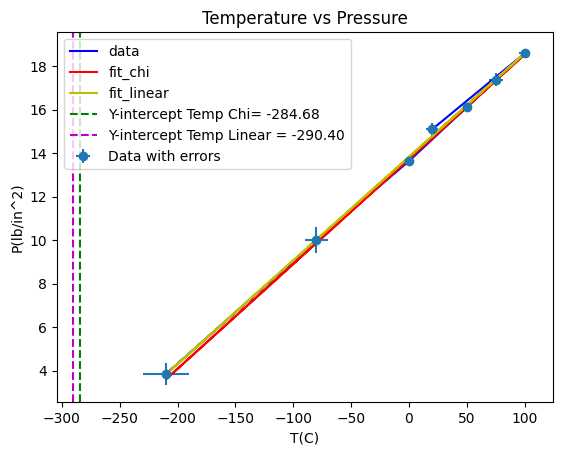

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Reading Data
data = pd.read_csv('/Users/emmettralston/Fit Analysis for Ideal Gas Data/SampleData.csv')

temp  = pd.to_numeric(data["Unnamed: 1"].iloc[4:11])
pressure = pd.to_numeric(data['Unnamed: 2'].iloc[4:11])
Puncertainty = pd.to_numeric(data['Unnamed: 3'].iloc[4:11])
Terrors = pd.to_numeric(data['Unnamed: 4'].iloc[4:11])

#Linear Least Squares Fit
fit_parameters_2 = np.polyfit(temp,pressure,1)
fit_line_2 = np.polyval(fit_parameters_2, temp)

slope_2, intercept_2 = fit_parameters_2
y_intercept_temp_2 = -intercept_2 / slope_2 #y-intercept of fit

#Linear Chi-Squared Fit
weights =  1 / (Terrors ** 2)

A = np.vstack([temp, np.ones(len(temp))]).T
W = np.diag(weights)
fit_parameters, residuals, rank, s = np.linalg.lstsq(W @ A, weights * pressure, rcond=None)

slope, intercept = fit_parameters
fit_line = slope * temp + intercept
chi_square = np.sum(((pressure - fit_line) / Puncertainty) ** 2)

y_intercept_temp = -intercept / slope #y-intercept of fit

#Plotting Data, Fits, Error Bars,y-intercepts
print(f"Slope of the chi-squared fit line: {slope:.2f}")
print(f"Chi-square: {chi_square:.2f}")
figsize = (30, 60)

plt.errorbar(temp, pressure, xerr= Terrors, yerr=Puncertainty, fmt='o', label='Data with errors')
plt.plot(temp,pressure, color ='b', linestyle ='-', label = "data")
plt.plot(temp,fit_line, 'r-', label = "fit_chi")
plt.plot(temp,fit_line_2, 'y-', label = "fit_linear")
plt.axvline(x=y_intercept_temp, color='g', linestyle='--', label=f'Y-intercept Temp Chi= {y_intercept_temp:.2f}')
plt.axvline(x=y_intercept_temp_2, color='m', linestyle='--', label=f'Y-intercept Temp Linear = {y_intercept_temp_2:.2f}')
plt.xlabel("T(C)")
plt.ylabel("P(lb/in^2)")
plt.title("Temperature vs Pressure")
plt.legend()